In [16]:
import matplotlib.pyplot as plt
import soundfile as sf
import torch
import numpy as np
import librosa
import librosa.display

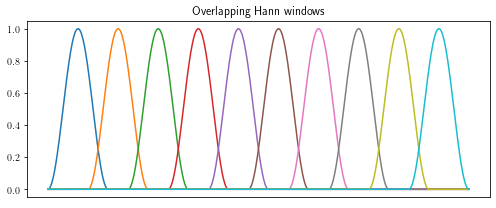

In [19]:
hanns = np.zeros((10,1050))
fig, ax = plt.subplots(figsize=(7,3))

for i in range(9):
    hanns[i] += np.pad(torch.hann_window(150), (i*100,1050-i*100-150))
    ax.plot(np.arange(1050), hanns[i])
ax.plot(np.arange(1050), np.pad(torch.hann_window(150), (900,0)))
ax.set(title="Overlapping Hann windows")
plt.xticks([])
plt.tight_layout()
plt.savefig("hann.pdf")

In [53]:
aud, fs = sf.read("0007.wav")
aud = aud[28000:50000]

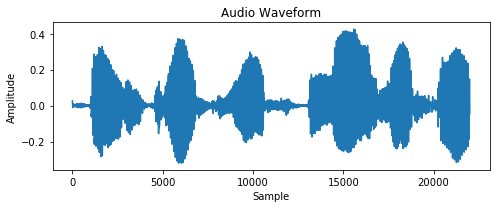

In [267]:
fig, ax = plt.subplots(figsize=(7,3))
ax.plot(aud)
ax.set(xlabel="Sample",ylabel='Amplitude', title='Audio Waveform')
plt.tight_layout()
plt.savefig("wave.pdf")

In [255]:
stft = torch.stft(torch.from_numpy(aud), n_fft=2048, win_length=1200, hop_length=100, onesided=True, return_complex=True)

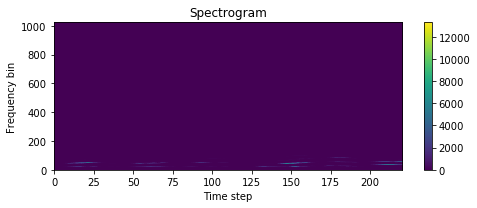

In [268]:
spec = np.abs(stft)**2
fig, ax = plt.subplots(figsize=(7,3))
img = ax.imshow(spec,aspect='auto',  origin='lower', interpolation="nearest")
plt.colorbar(img)
ax.set(xlabel="Time step",ylabel='Frequency bin', title='Spectrogram')
plt.tight_layout()
plt.savefig("spec.pdf")
plt.show()

In [283]:
spec = np.abs(stft)
spec /= spec.max()
spec[spec < 0.01] = 0.01
spec = np.log10(spec)


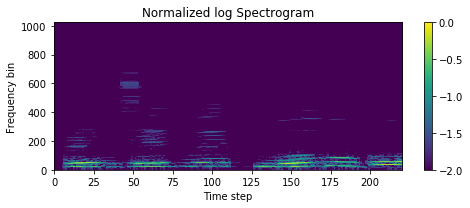

In [284]:
fig, ax = plt.subplots(figsize=(7,3))
img = ax.imshow(spec,aspect='auto',  origin='lower', interpolation="nearest")
plt.colorbar(img)
ax.set(xlabel="Time step",ylabel='Frequency bin', title='Normalized log Spectrogram')
plt.tight_layout()
#plt.savefig("log_spec.pdf")
plt.show()

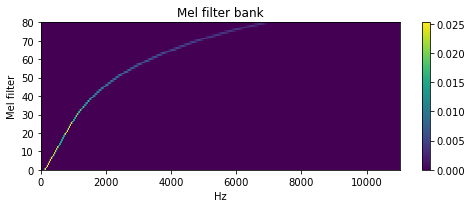

In [274]:
filt = librosa.filters.mel(24000, 2048, 80, fmax=7600, fmin=125)
fig, ax = plt.subplots(figsize=(7,3))
img = librosa.display.specshow(filt, x_axis='linear', ax=ax, cmap="viridis")
ax.set(ylabel='Mel filter', title='Mel filter bank')
plt.yticks(np.arange(0,81,10))
plt.tight_layout()
fig.colorbar(img, ax=ax)
plt.savefig("mels.pdf")
plt.show()

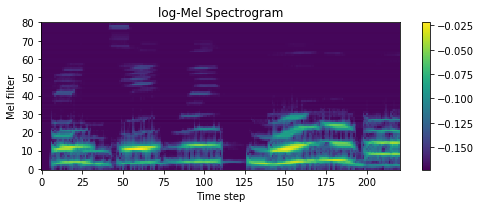

In [276]:
mel_spec = filt.dot(spec)
fig, ax = plt.subplots(figsize=(7,3))
img = ax.imshow(mel_spec,aspect='auto',  origin='lower', interpolation="nearest")
plt.colorbar(img)
ax.set(xlabel="Time step",ylabel='Mel filter', title='log-Mel Spectrogram')
plt.yticks(np.arange(0,81,10))
plt.tight_layout()
plt.savefig("logmel_spec.pdf")
plt.show()